When your cursor is in a cell, hit "Shift+Enter" to run the code in that cell.
The code in the next cell below defines all of the major Metropolis Monte Carlo
components. I have included example cells 
that call the run(kT,steps) function defined in the first cell, which performs a 
simulationat a specified kT for a number of steps.

Note: if you change code in the first cell, you'll need to "Shift+Enter" to 
communicate those changes to the Python kernel, and then you'll need to 
"Shift+Enter" in any cells where you'd like to see those changes propagated.
If you think you've messed everything up, download this file again and upload it to
codelab.boisestate.edu

I have also included some example plotting code in the bottom cell.

Here we have a model of five "particles" in a volume with ten "sites". A '1' in 
our system array indicates there's a particle there, and a '0' indicates the site
is empty. These particles are "attractive", in the sense that there is a negative
potential energy (-1 units of kT) associated with two particles being in adjacent
sites. 

    0.a How many distinguishable microstates does this system have?
        0.b What if there were twenty sites for the five "particles"?
        0.c What if there were fifteen particles and twenty sites?
    1. Using kT=1, experiment with different numbers of timesteps:
        1.a What is the average system energy at this temperature?
        1.b How does the standard deviation in the energy scale with the number of runs?
        1.c What is a practical upper limit for how long we should run a simulation?
    2. How does the average of the energy of the system vary with T?
        2.a. Plot <E> for temperatures varying between 0.01 and 2.0
        2.b. Do any "interesting" temperatures stand out from these data? If so, why?
    3.a What is the most likely configuration at T=0.05?
        3.b and at T=3.0?
    4. How large of a system can you "equilibrate" with this code?
    5. What factors matter for how long a system takes to equilibrate?
    6. Is this code correct? If not, include your improvements in a new cell.


In [2]:
%matplotlib inline
import numpy
import matplotlib.pyplot as plt
def energy(s):
    e = 0
    for i in range(len(s)-1):
        if s[i]==1:
            if s[i+1]==1:
                e-=1       #-1 energy for each pair of adjacent 1's
    return e

def trial_move(s): #randomly swap two positions in the system
    temp = numpy.copy(s)
    p1 = numpy.random.randint(0,len(s))
    p2 = numpy.random.randint(0,len(s))
    temp[p2], temp[p1] = temp[p1],temp[p2]
    return temp

def accept(de,kT): #implement detailed balance
    if numpy.exp(-de/kT) > numpy.random.rand():
        return True
    return False
        
def run(kT,steps): #specify temperature, number of steps to perform simulation
    system = numpy.array([1,0]*5) #initialize 1's so they're not touching
    e = numpy.array( int(steps)*[0])  #store energies in here
    for trials in range(int(steps)):
        trial = trial_move(system)
        de = energy(trial)-energy(system)
        if accept(de,kT):
            system = numpy.copy(trial)
        e[trials] = energy(system)
    return kT,e.mean(), e.std() #Return the temperature, average energy, and standard deviation

In [3]:
def num_microstates(n,r):
    return ?

### Problem 0
    0.a How many distinguishable microstates does this system have?
        0.b What if there were twenty sites for the five "particles"?
        0.c What if there were fifteen particles and twenty sites?

In [ ]:
print("There are {} distinguishable microstates for a system with 10 sites and 5 'particles'.".format(num_microstates(10,5)))
print("There are {} distinguishable microstates for a system with 20 sites and 5 'particles'.".format(num_microstates(20,5)))
print("There are {} distinguishable microstates for a system with 15 sites and 20 'particles'.".format(num_microstates(20,15)))


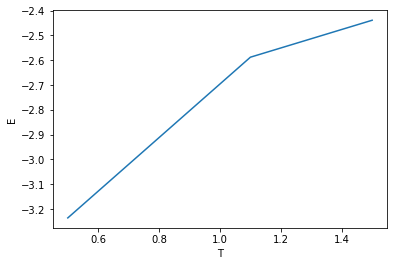

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
Temperatures = [0.5,1.1,1.5]
avgE = []
for T in Temperatures:
    t,a,s = run(T,1e5)
    avgE.append(a)
plt.xlabel("T")
plt.ylabel("E")
plt.plot(Temperatures,avgE)
plt.show()